Yehezkiel Chandra Putra Cahyono (0706022310038)

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [134]:
url = 'https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv'
df = pd.read_csv(url)

# Inspect the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [135]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [136]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Dari Info Diatas datanya terlihat normal normal saja kecuali data Health issues yang banyak kosongnya

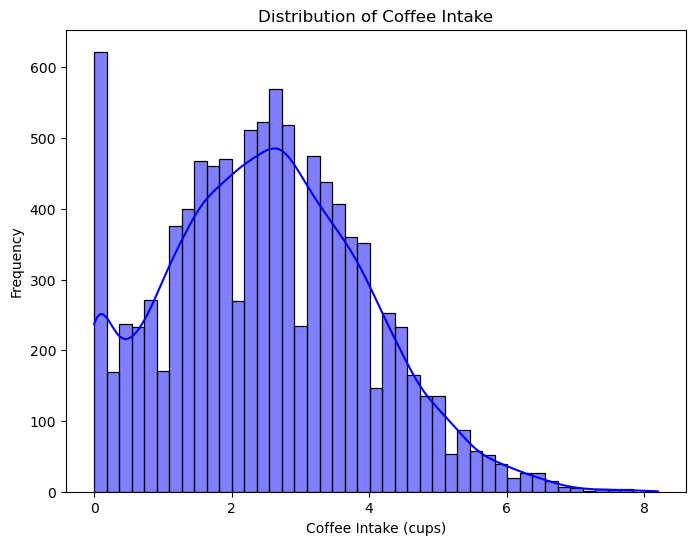

In [137]:
# Visualization 1: Distribution of Coffee Intake
plt.figure(figsize=(8,6))
sns.histplot(df['Coffee_Intake'], kde=True, color='blue')
plt.title('Distribution of Coffee Intake')
plt.xlabel('Coffee Intake (cups)')
plt.ylabel('Frequency')
plt.show()


Berdasarkan Scatterplot diatas hampir tidak ada hubungan antara coffee intake dengan sleep quality by hours

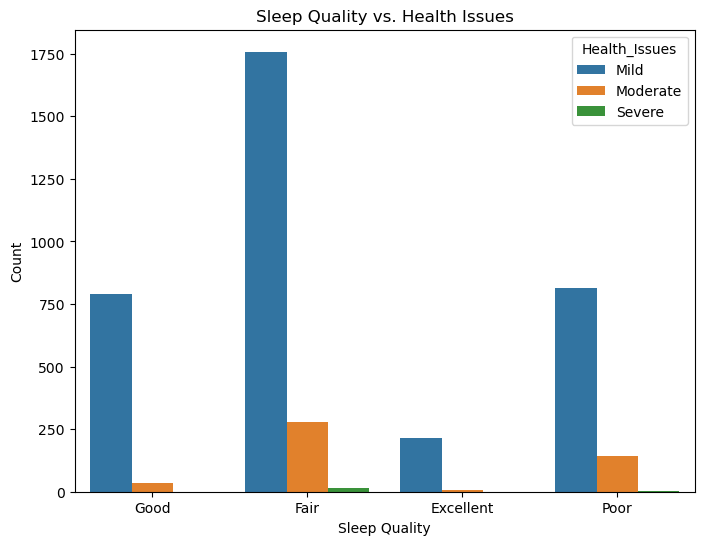

In [138]:
# Visualization 2: Sleep Quality vs. Health Issues
plt.figure(figsize=(8,6))
sns.countplot(x='Sleep_Quality', hue='Health_Issues', data=df)
plt.title('Sleep Quality vs. Health Issues')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

Sleep Quality sepertinya cukup menggambarkan tapi bukan faktor utama dalam health issue

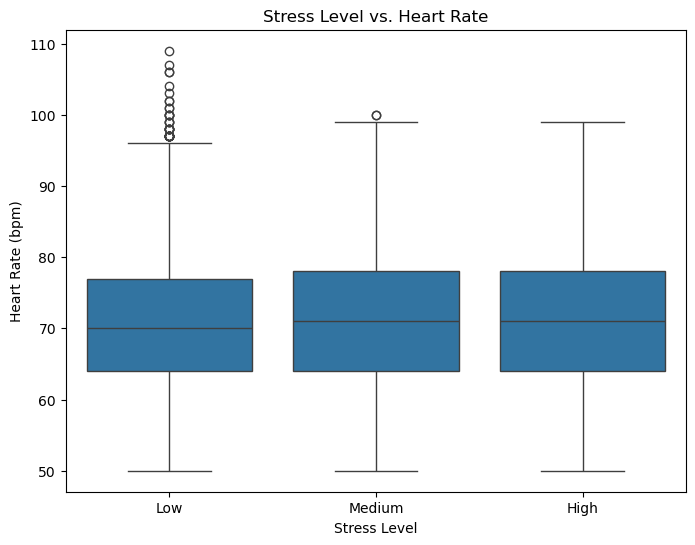

In [139]:
# Visualization 3: Stress Level and Heart Rate
plt.figure(figsize=(8,6))
sns.boxplot(x='Stress_Level', y='Heart_Rate', data=df)
plt.title('Stress Level vs. Heart Rate')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate (bpm)')
plt.show()

Stress level Tidak berpengaruh pada BPM 

In [140]:
# Encoding for ordinal column
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {
 'Australia': 1,
 'Belgium': 2,
 'Brazil': 3,
 'Canada': 4,
 'China': 5,
 'Finland': 6,
 'France': 7,
 'Germany': 8,
 'India': 9,
 'Italy': 10,
 'Japan': 11,
 'Mexico': 12,
 'Netherlands': 13,
 'Norway': 14,
 'South Korea': 15,
 'Spain': 16,
 'Sweden': 17,
 'Switzerland': 18,
 'UK': 19,
 'USA': 20
}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {
 'Healthcare': 1,
 'Office': 2,
 'Other': 3,
 'Service': 4,
 'Student': 5
}
df['Health_Issues'] = df['Health_Issues'].fillna('Unkown')
health_issues_map = {
 'Mild': 1,
 'Moderate': 2,
 'Unkown': 3,
 'Severe': 4
}
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}


df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)



Di Encode seperti biasa

In [141]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

Data Training

In [142]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [143]:
X_train.shape, X_test.shape

((8000, 15), (2000, 15))

In [144]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [145]:
y_pred_gini = clf_gini.predict(X_test)

In [146]:


print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


[Text(0.5, 0.9, 'x[7] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.7, 'x[1] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[8] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[8] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [6, 8, 0, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0, 0]'),
 Text(0.375, 0.5, 'x[8] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[1] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[8] <= 29.95

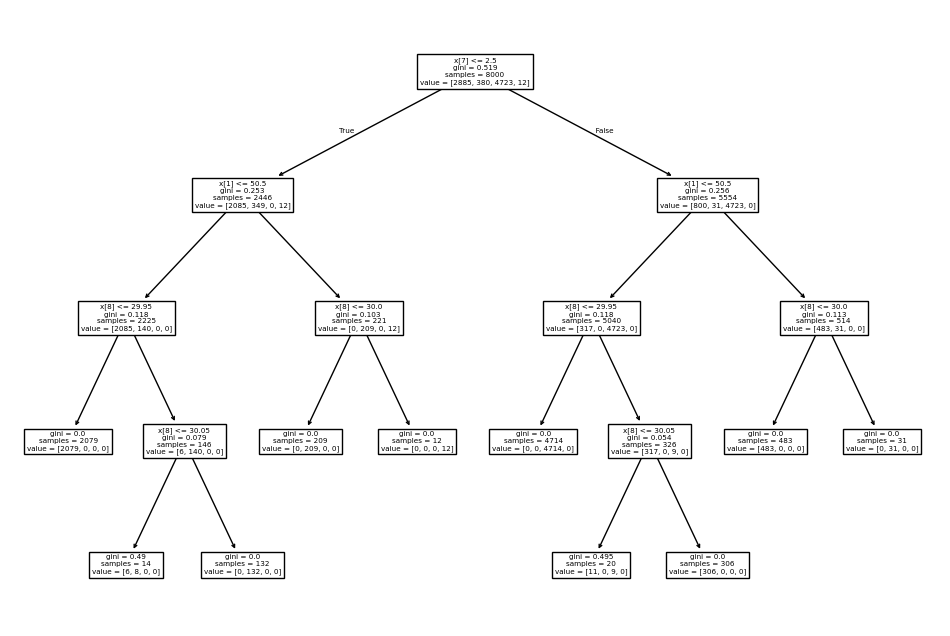

In [147]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [148]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [149]:
y_pred_en = clf_en.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[7] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.625, 'x[1] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.375, 0.375, 'x[8] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[1] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [317, 0, 4723, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

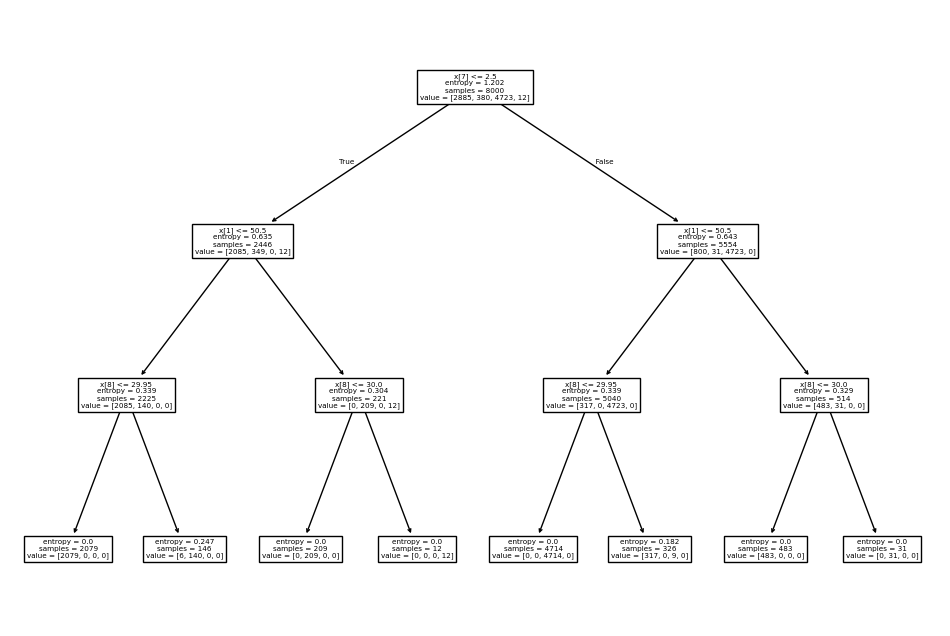

In [151]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [152]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [153]:
y_pred_nb = nb_classifier.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8580


In [155]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00      1218
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [156]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00      1218
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [157]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.89      0.70      0.78       694
           2       0.71      0.14      0.24        83
           3       0.85      1.00      0.92      1218
           4       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.49      2000
weighted avg       0.85      0.86      0.84      2000



d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [160]:
# Pastikan saat training ID sudah di-drop
X = df.drop(columns=['ID','Health_Issues'])
y = df['Health_Issues']

# Split + training Decision Tree Gini
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# --- New data encoded sesuai mapping
row = {
    'Age': 28,
    'Gender': gender_map['Male'],
    'Country': country_map['Brazil'],
    'Occupation': occupation_map['Student'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 2,
    'Smoking': 1,
    'Alcohol_Consumption': 1
}

# Buat dataframe sesuai kolom training (X.columns)
input_df = pd.DataFrame([row], columns=X.columns)

# Prediksi
prediction_gini = clf_gini.predict(input_df)

inv_health_map = {0:'None', 1:'Mild', 2:'Moderate', 3:'Severe'}
print("Prediksi Health Issues:", inv_health_map[prediction_gini[0]])

Prediksi Health Issues: Mild


GINI DAN entropy memberikan hasil yang lebih akurat sementara naive bayes tidak se akurat itu dimana gini bisa memberikan 0.99 sementara naive bayes 0.85